# OpenScope's Global/Local Oddball Dataset

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [69]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

In [70]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Downloading Ecephys File

In [71]:
dandiset_id = "000336"
dandi_filepath = "sub-1170220944/sub-1170220944.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [72]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

File already exists
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Selecting Stimulus Times

In [73]:
nwb.intervals.keys()

dict_keys(['create_receptive_field_mapping_presentations', 'init_grating_presentations', 'init_intermission_presentations', 'invalid_times', 'spontaneous_presentations'])

In [74]:
stim_table = nwb.intervals["init_grating_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'contrast', 'temporal_frequency', 'spatial_frequency', 'orientation', 'color', 'mask', 'opacity', 'size', 'units', 'stimulus_index', 'phase', 'tags', 'timeseries')


,start_time,stop_time,stimulus_name,stimulus_block,contrast,temporal_frequency,spatial_frequency,orientation,color,mask,opacity,size,units,stimulus_index,phase,tags,timeseries
id,,,,,,,,,,,,,,,,,
0,40.120313,40.620705,init_grating,1.0,0.8,4.0,0.04,135.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(2, 1, timestamps pynwb.base.TimeSeries at 0x..."
1,41.121096,41.621550,init_grating,1.0,0.8,4.0,0.04,135.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(3, 1, timestamps pynwb.base.TimeSeries at 0x..."
2,42.122003,42.622430,init_grating,1.0,0.8,4.0,0.04,135.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(4, 1, timestamps pynwb.base.TimeSeries at 0x..."
3,43.122856,43.623205,init_grating,1.0,0.8,4.0,0.04,45.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(5, 1, timestamps pynwb.base.TimeSeries at 0x..."
4,44.123553,44.624020,init_grating,1.0,NaN,NaN,NaN,NaN,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,N/A,[stimulus_time_interval],"[(6, 1, timestamps pynwb.base.TimeSeries at 0x..."
5,45.124486,45.624925,init_grating,1.0,0.8,4.0,0.04,135.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(7, 1, timestamps pynwb.base.TimeSeries at 0x..."
6,46.125363,46.625795,init_grating,1.0,0.8,4.0,0.04,135.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(8, 1, timestamps pynwb.base.TimeSeries at 0x..."
7,47.126226,47.626620,init_grating,1.0,0.8,4.0,0.04,135.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(9, 1, timestamps pynwb.base.TimeSeries at 0x..."
8,48.127013,48.627445,init_grating,1.0,0.8,4.0,0.04,45.0,"[1.0, 1.0, 1.0]",None,1.0,"[1000.0, 1000.0]",deg,1.0,0.0,[stimulus_time_interval],"[(10, 1, timestamps pynwb.base.TimeSeries at 0..."


In [75]:
print(np.mean(np.diff(stim_table.start_time)))
print({elem for elem in stim_table.orientation if not np.isnan(elem)})

1.082116034139874
{45.0, 135.0}


In [76]:
# i.e. select times where there is a local oddball
lo_stim_select = lambda prev_row, row, next_row: prev_row.orientation.item() == 135.0 and row.orientation.item() == 45.0 and np.isnan(next_row.orientation.item())
lo_stim_times = [float(stim_table[i].start_time) for i in range(1,len(stim_table)-1) if lo_stim_select(stim_table[i-1], stim_table[i], stim_table[i+1])]
print(len(lo_stim_times))

# select times where there is a global oddball
go_stim_select = lambda prev_row, row, next_row: prev_row.orientation.item() == 135.0 and row.orientation.item() == 135.0 and np.isnan(next_row.orientation.item())
go_stim_times = [float(stim_table[i].start_time) for i in range(1,len(stim_table)-1) if go_stim_select(stim_table[i-1], stim_table[i], stim_table[i+1])]
print(len(go_stim_times))

733
289


### Selecting Units

In [77]:
units = nwb.units
units[:10]

,presence_ratio,nn_hit_rate,PT_ratio,peak_channel_id,firing_rate,isolation_distance,recovery_slope,repolarization_slope,amplitude_cutoff,local_index,...,amplitude,snr,waveform_halfwidth,nn_miss_rate,cluster_id,silhouette_score,isi_violations,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
18,0.99,0.999333,0.628162,2,7.835752,66.765503,-0.332403,1.416811,0.500000,0,...,128.863020,3.034865,0.164824,0.000042,0,-1.000000,0.112328,"[4.842987541773509, 4.8589541960946105, 4.8675...","[0.00031699813149612245, 0.0003468812678219095...","[[0.0, 0.22854000000000219, 1.3273650000000004..."
19,0.99,1.000000,0.619412,5,63.903966,127.166939,-0.308704,1.288098,0.011588,1,...,291.209295,2.307074,0.151089,0.001168,1,0.182371,0.004210,"[4.877987514711207, 4.8986874987057885, 4.9231...","[0.00029969783848378054, 0.0003623791955126675...","[[0.0, -1.501109999999997, -3.581759999999996,..."
20,0.99,0.729333,3.565346,5,16.073600,52.134058,-0.218362,2.230072,0.124309,2,...,527.881965,3.824218,0.151089,0.013992,2,0.228691,0.032711,"[12.949881273448561, 26.455537497417367, 33.07...","[0.0002638984950144834, 0.0002502149412231526,...","[[0.0, -0.23887499999999706, 2.025660000000001..."
21,0.94,0.531469,3.658532,5,8.747109,37.359204,-0.268321,1.640117,0.054297,3,...,382.384860,2.611597,0.109883,0.011049,3,0.049394,2.569723,"[363.3902436430641, 528.7830824264635, 549.533...","[0.0003408208177296241, 0.0003419064263950328,...","[[0.0, 0.025934999999999528, 0.458249999999997..."
22,0.92,0.623333,5.475497,5,16.757927,49.355351,-0.069562,1.677741,0.147427,4,...,393.233490,2.650328,0.123618,0.025382,4,0.023068,1.972987,"[541.641605817468, 545.8957691947763, 627.1884...","[0.0003316046922891168, 0.000360660159558905, ...","[[0.0, -0.26949000000000134, -0.36055499999999..."
23,0.21,-1.000000,1.951002,5,0.006479,43.410861,-0.328442,1.355174,0.232295,5,...,318.825000,2.490679,0.164824,0.000000,5,-1.000000,0.000000,"[1591.0797277155739, 2734.5023436106694, 3625....","[0.00028950888431848016, 0.0003134441023373939...","[[0.0, 3.6504000000000048, 4.797000000000005, ..."
24,0.59,0.012346,6.145541,5,0.836069,21.297958,-0.039147,1.635129,0.016711,6,...,407.465565,3.112654,0.109883,0.003610,6,0.003363,14.382948,"[1459.5587294088218, 1963.824172839467, 2398.0...","[0.0002591945318918127, 0.0002616807064919432,...","[[0.0, -0.3248700000000009, -1.332044999999998..."
25,0.99,0.988667,1.266711,8,62.548528,94.719922,-0.450775,0.947225,0.009485,7,...,235.548495,2.199980,0.151089,0.001876,7,0.156287,0.005326,"[4.912554154650629, 4.92175414753711, 5.181620...","[0.00018161736568238812, 0.0001528187361881488...","[[0.0, -0.34144500000000155, -0.62185499999999..."
26,0.99,0.971014,0.642695,9,1.389388,77.205943,-1.855398,6.144608,0.000259,8,...,1524.688425,6.718141,0.123618,0.000100,8,0.346563,2.717305,"[5.415520432419134, 5.422020427393278, 5.81212...","[0.0013609788582368536, 0.0012820666136670942,...","[[0.0, -0.06435000000000546, -0.51051000000000..."


In [78]:
# select electrodes
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'VISp2/3', 'DG-po', 'MB', 'LP', 'VISam6a', 'NOT', 'VISp4', 'VISl2/3', 'root', 'VISpm5', 'VISpm4', 'MGd', 'VISrl6a', 'PoT', 'VISpm6a', 'VISl6a', 'VISrl4', 'APN', 'VISam5', 'VISp5', 'DG-mo', 'VISam4', 'VISpm2/3', 'MGm', 'VISam2/3', 'VISrl2/3', 'VISp6a', 'VISl6b', 'VISam6b', 'VISl5', 'VISpm6b', 'VISl4', 'VISrl5', 'CA1', 'SGN', 'DG-sg', 'VISrl6b', 'POST'}


In [79]:
### selecting units spike times

brain_regions = ["VISp6a", "VISp5", "VISp4", "VISp6b", "VISp2/3"]

# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
    units_spike_times += location_units_spike_times

print(len(units_spike_times))

172


### Generating Spike Matrix

In [80]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [81]:
def get_spike_matrix(units_spike_times, stim_times, bin_edges, time_resolution):
    n_units = len(units_spike_times)
    n_trials = len(stim_times)

    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((n_units, n_trials, len(bin_edges)))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(n_units):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [82]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

lo_spike_matrix = get_spike_matrix(units_spike_times, lo_stim_times, bin_edges, time_resolution)
go_spike_matrix = get_spike_matrix(units_spike_times, go_stim_times, bin_edges, time_resolution)

print(lo_spike_matrix.shape)
print(go_spike_matrix.shape)

(172, 733, 150)
(172, 289, 150)


### Showing Response Windows

In [83]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        fig.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [84]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols+2, 2*rows+2), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))
    
    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)


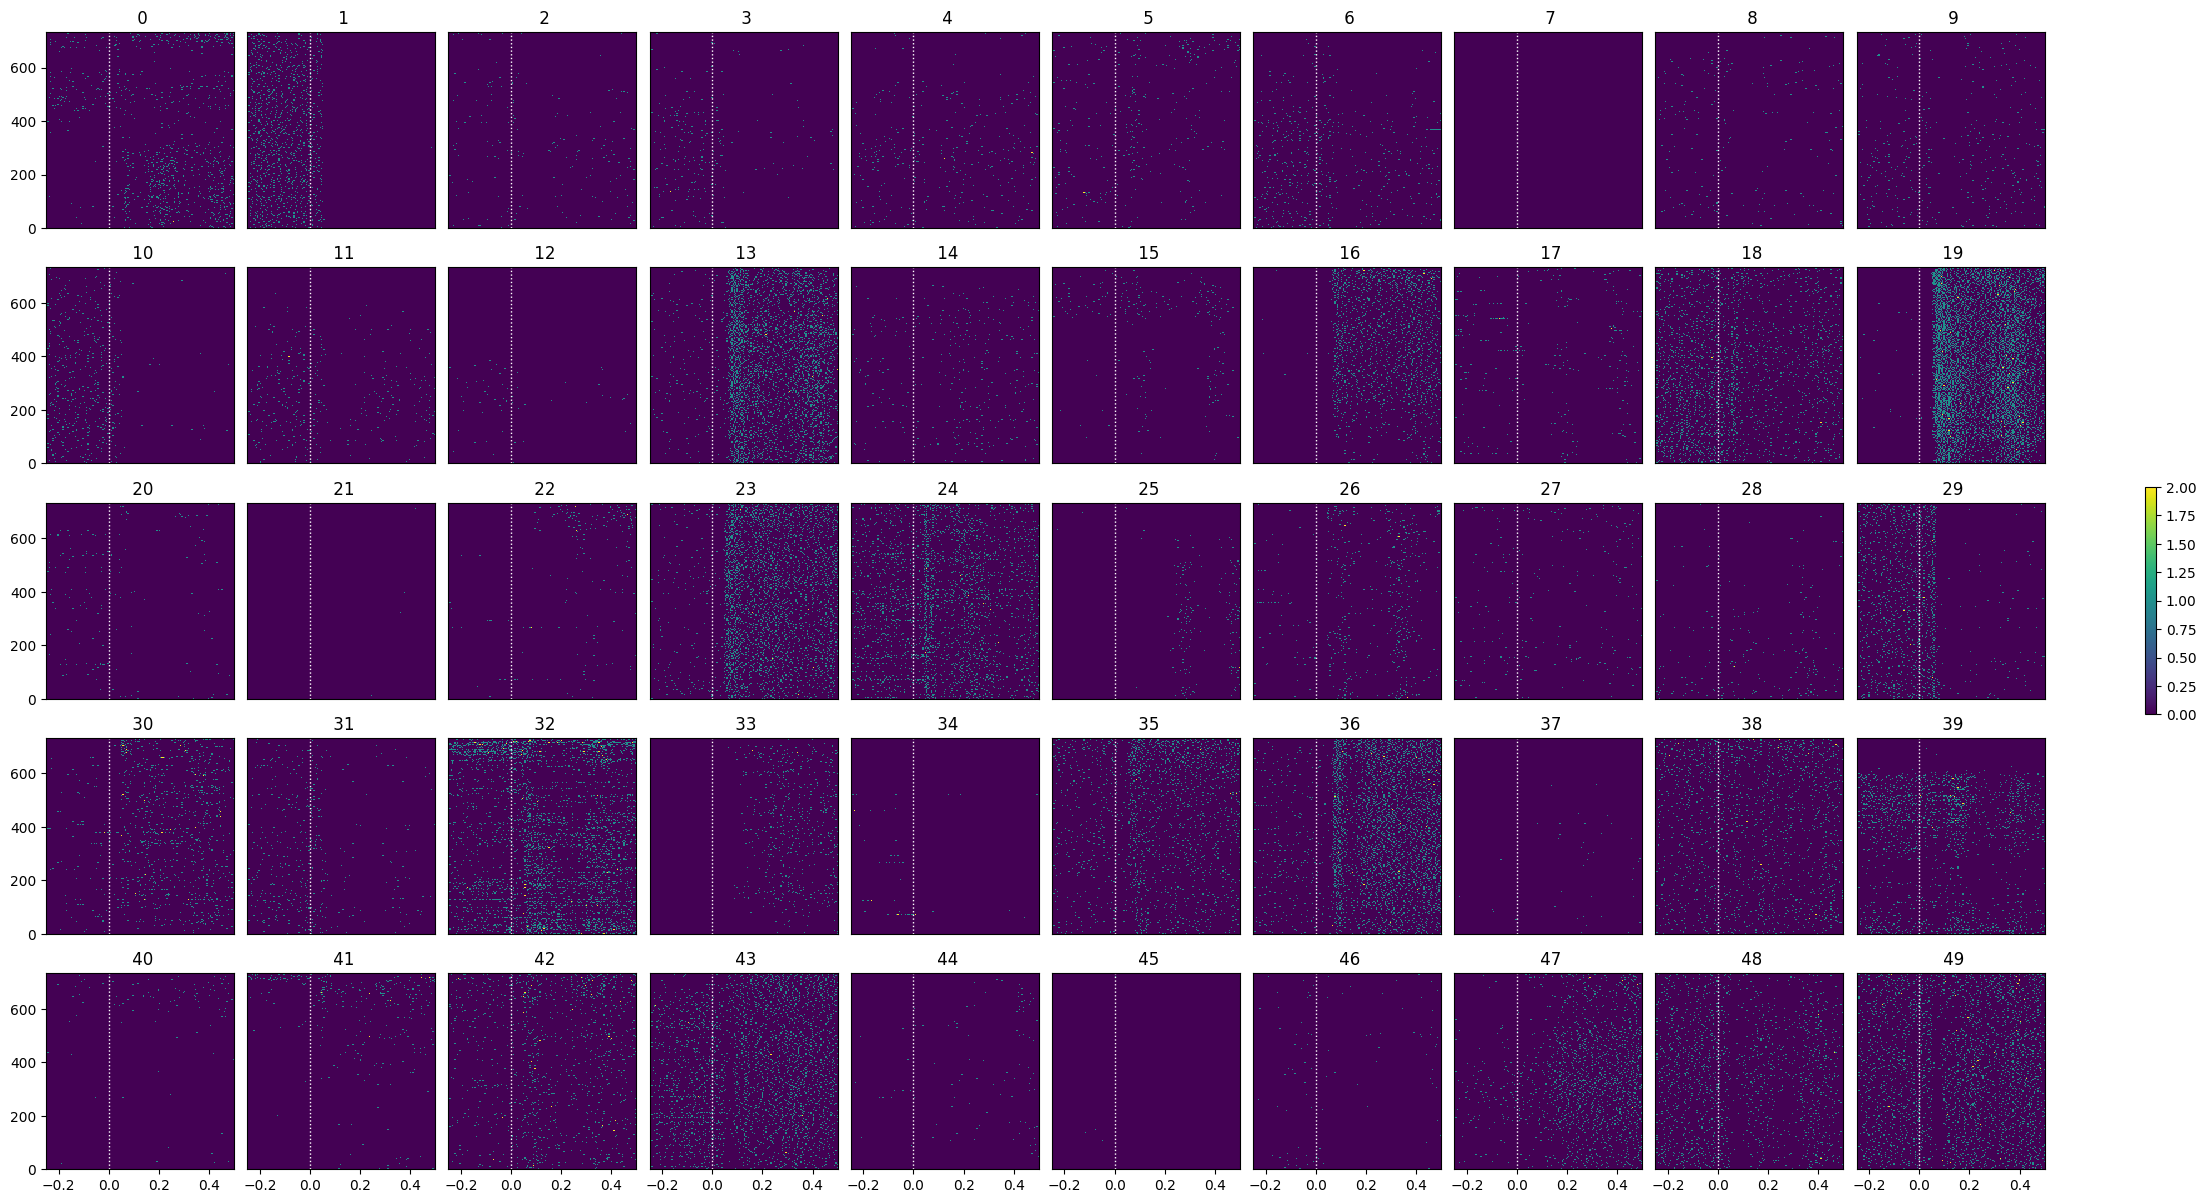

In [85]:
show_many_responses(lo_spike_matrix, 5, 10)

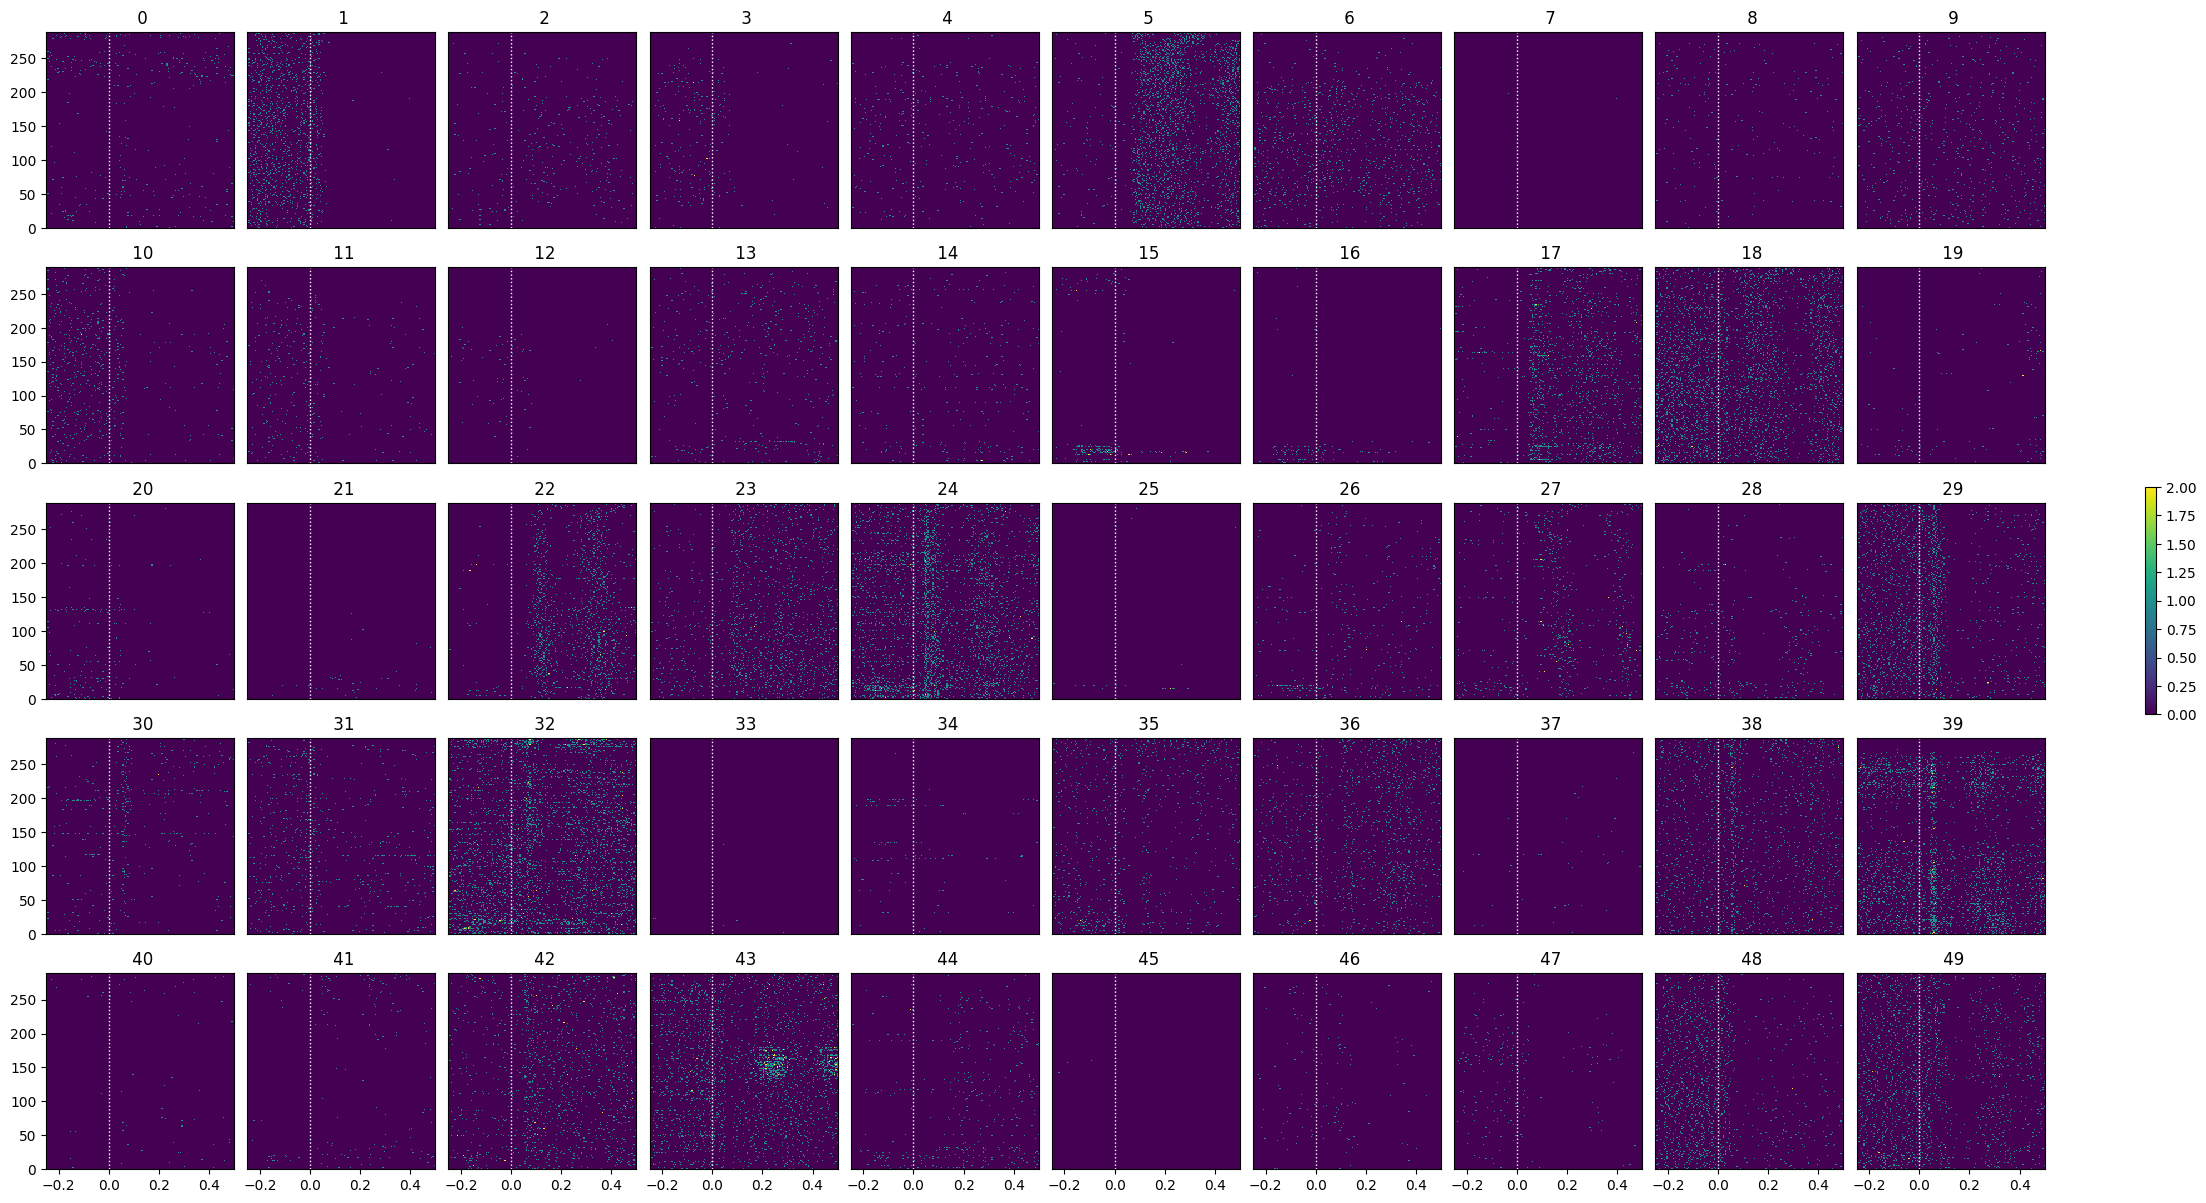

In [86]:
show_many_responses(go_spike_matrix, 5, 10)

### Selecting Cells

In [87]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(np.logical_or(unit_z_scores > 2, unit_z_scores < -2))[0]

C:\Users\carter.peene\AppData\Local\Temp\ipykernel_7980\4082693126.py:9: RuntimeWarning: divide by zero encountered in true_divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means


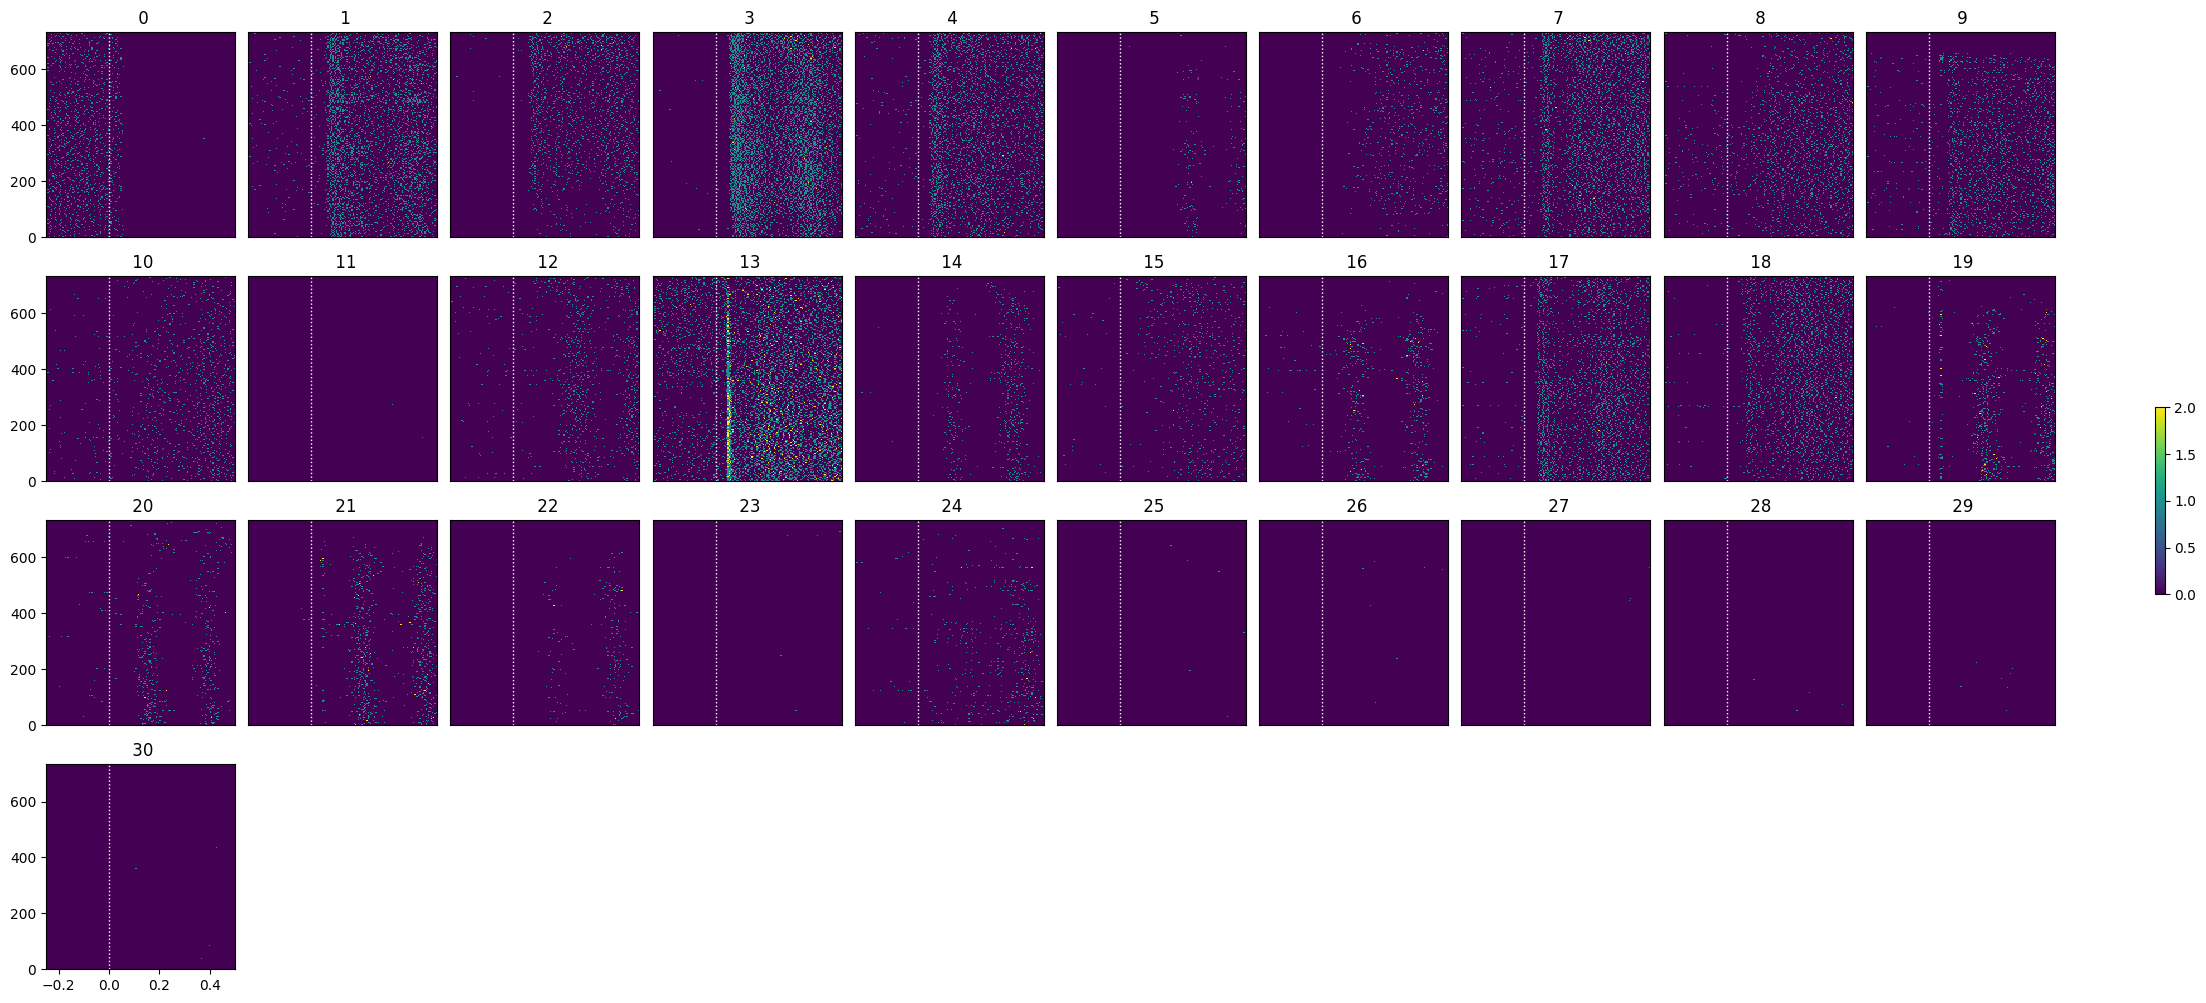

In [88]:
lo_selected_idxs = select_cells(lo_spike_matrix, stimulus_onset_idx)
show_many_responses(lo_spike_matrix[lo_selected_idxs], 5, 10)

C:\Users\carter.peene\AppData\Local\Temp\ipykernel_7980\4082693126.py:9: RuntimeWarning: divide by zero encountered in true_divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means


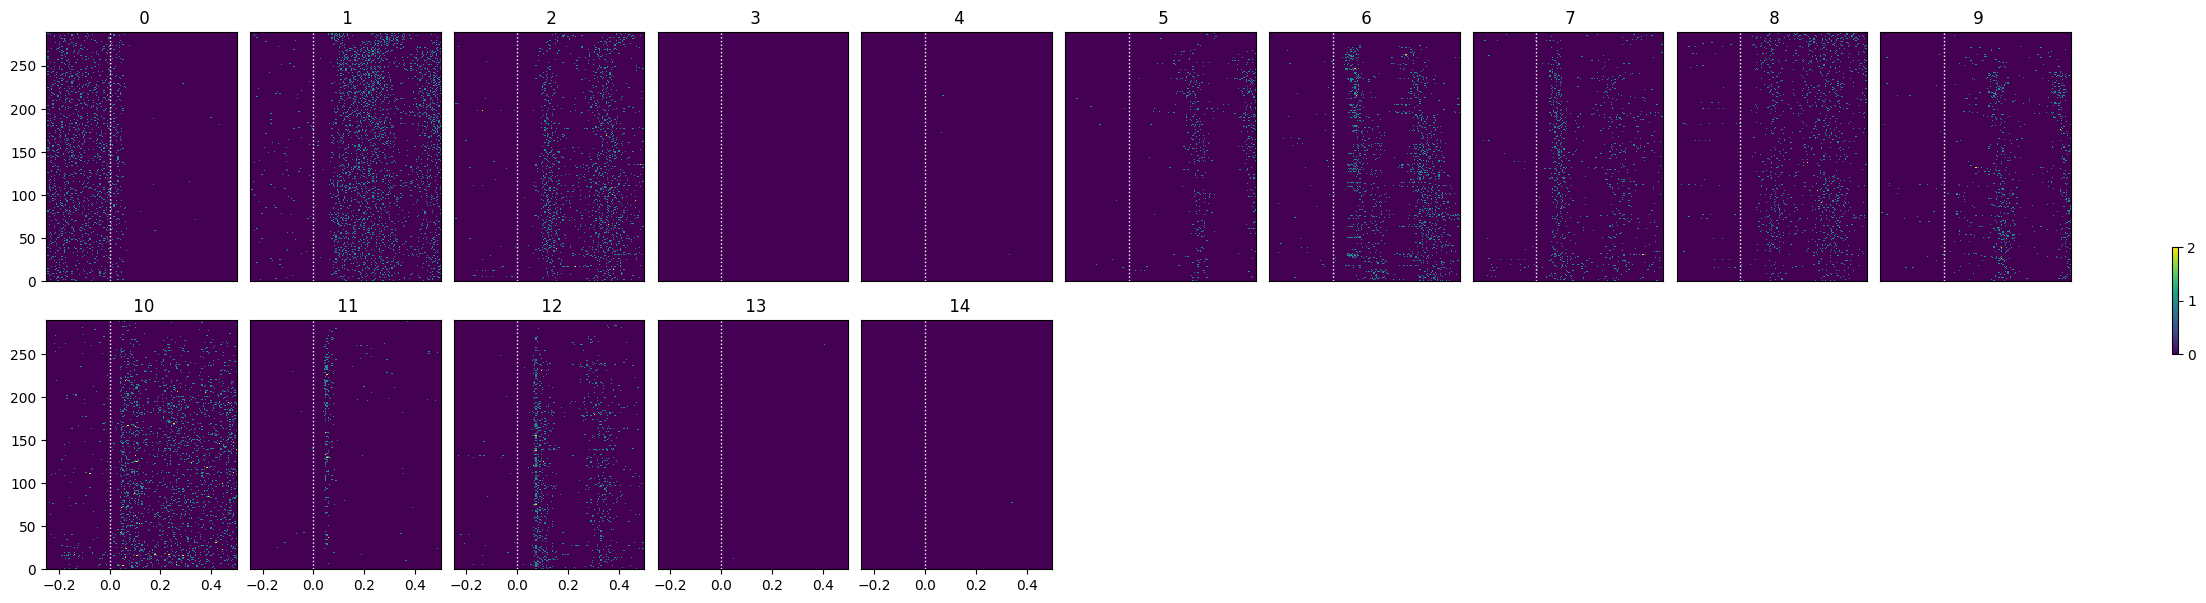

In [89]:
go_selected_idxs = select_cells(go_spike_matrix, stimulus_onset_idx)
show_many_responses(go_spike_matrix[go_selected_idxs], 5, 10)

### Showing Receptive Fields

In [90]:
rf_stim_table = nwb.intervals["create_receptive_field_mapping_presentations"].to_dataframe()
rf_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,contrast,temporal_frequency,spatial_frequency,orientation,color,mask,opacity,size,units,stimulus_index,x_position,y_position,phase,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,6227.320833,6227.571051,create_receptive_field_mapping,96.0,0.8,4.0,0.08,90.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,-40.0,-10.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5808, 2, timestamps pynwb.base.TimeSeries at..."
1,6227.571051,6227.821270,create_receptive_field_mapping,96.0,0.8,4.0,0.08,45.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,10.0,-40.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5810, 1, timestamps pynwb.base.TimeSeries at..."
2,6227.821270,6228.071488,create_receptive_field_mapping,96.0,0.8,4.0,0.08,0.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,0.0,-40.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5811, 1, timestamps pynwb.base.TimeSeries at..."
3,6228.071488,6228.321706,create_receptive_field_mapping,96.0,0.8,4.0,0.08,90.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,-30.0,-20.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5812, 1, timestamps pynwb.base.TimeSeries at..."
4,6228.321706,6228.571918,create_receptive_field_mapping,96.0,0.8,4.0,0.08,90.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,30.0,0.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5813, 2, timestamps pynwb.base.TimeSeries at..."
5,6228.571918,6228.822130,create_receptive_field_mapping,96.0,0.8,4.0,0.08,0.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,30.0,-40.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5815, 1, timestamps pynwb.base.TimeSeries at..."
6,6228.822130,6229.072341,create_receptive_field_mapping,96.0,0.8,4.0,0.08,0.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,30.0,-40.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5816, 1, timestamps pynwb.base.TimeSeries at..."
7,6229.072341,6229.322553,create_receptive_field_mapping,96.0,0.8,4.0,0.08,45.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,-10.0,0.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5817, 1, timestamps pynwb.base.TimeSeries at..."
8,6229.322553,6229.572761,create_receptive_field_mapping,96.0,0.8,4.0,0.08,45.0,"[1.0, 1.0, 1.0]",circle,1.0,"[20.0, 20.0]",deg,100.0,-10.0,10.0,"[26711.93333333, 26711.93333333]",[stimulus_time_interval],"[(5818, 2, timestamps pynwb.base.TimeSeries at..."


In [91]:
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]
print(xs)
print(ys)
print(field_units)

[-40. -30. -20. -10.   0.  10.  20.  30.  40.]
[-40. -30. -20. -10.   0.  10.  20.  30.  40.]
deg


In [92]:
### get receptive field of a unit using its spike times and the stim table

def get_rf(spike_times):
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for stim_time in stim_times:
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [stim_time, stim_time+0.2])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [93]:
### compute receptive fields for each unit in selected units

lo_rfs = []
for idx in lo_selected_idxs:
    these_spike_times = units_spike_times[idx]
    lo_rfs.append(get_rf(these_spike_times))

go_rfs = []
for idx in go_selected_idxs:
    these_spike_times = units_spike_times[idx]
    go_rfs.append(get_rf(these_spike_times))

In [94]:
### display the receptive fields for each unit in a 2D plot

def display_rfs(rfs):
    n_rows = len(rfs)//10
    fig, axes = plt.subplots(n_rows+1, 10)
    fig.set_size_inches(12, n_rows+1)

    # handle case where there's <= 10 rfs
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for irf, rf in enumerate(rfs):
        ax_row = int(irf/10)
        ax_col = irf%10
        axes[ax_row][ax_col].imshow(rf, origin="lower")
    for ax in axes.flat[1:]:
        ax.axis('off')

    # making axis labels for first receptive field
    axes[0][0].set_xlabel(field_units)
    axes[0][0].set_ylabel(field_units)
    axes[0][0].xaxis.set_label_position("top") 
    axes[0][0].xaxis.set_ticks_position("top")
    axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
    axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].xaxis.get_ticklabels()) if i % 2 != 0]
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].yaxis.get_ticklabels()) if i % 2 != 0]


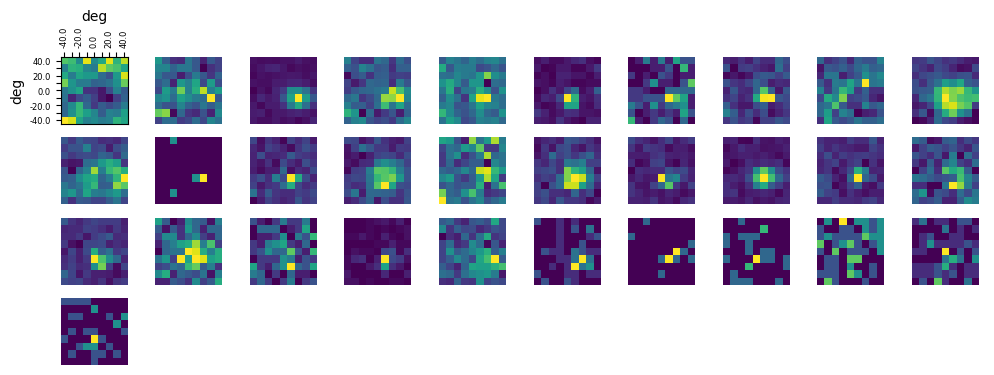

In [95]:
display_rfs(lo_rfs)

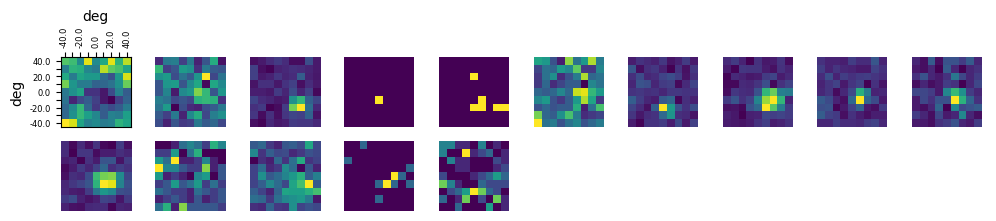

In [96]:
display_rfs(go_rfs)